In [1]:
import pm4py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 20})

In [3]:
log = pm4py.read_xes('data/input-logs/udonya.xes')

D:\Projects\apm-assignment-1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████████████████████████████████████| 16412/16412 [00:39<00:00, 413.79it/s]
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] =

### **Question 1 Part C**

In [5]:
variants = pm4py.get_variants(log)
variants = sorted(variants.items(), key=lambda x: x[1], reverse=True)

variants_info = {}
for index, variant in enumerate(variants):
    variants_info[f"Variant {index}"] = variant[1]

In [6]:
variants_df = pd.DataFrame({'Variant': list(variants_info.keys()), 'Count': list(variants_info.values())})
variants_df['percent'] = (variants_df['Count'] / 
                  variants_df['Count'].sum()) * 100
variants_df.head(40)

,Variant,Count,percent
0,Variant 0,899,5.477699
1,Variant 1,891,5.428954
2,Variant 2,628,3.826468
3,Variant 3,628,3.826468
4,Variant 4,374,2.278820
5,Variant 5,335,2.041189
6,Variant 6,235,1.431879
7,Variant 7,223,1.358762
8,Variant 8,186,1.133317
9,Variant 9,186,1.133317


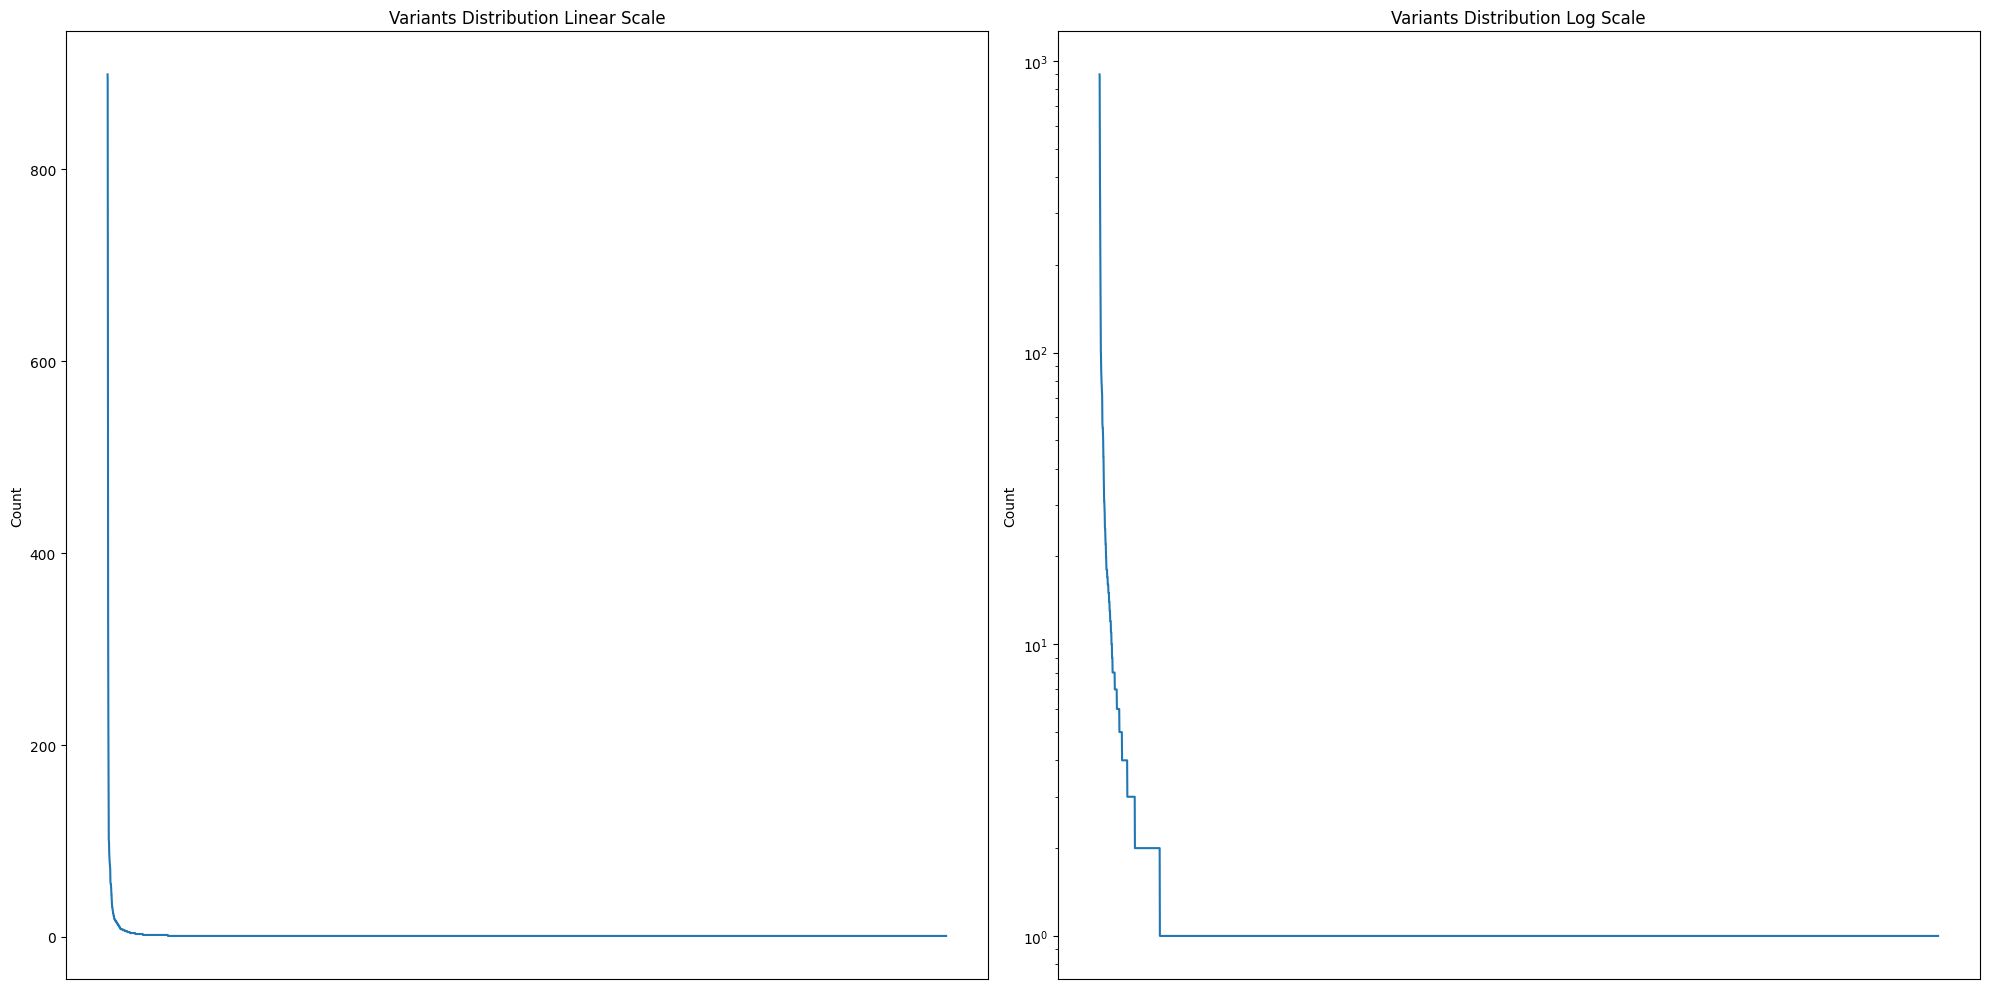

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].set_xticks([])
axes[1].set_xticks([])
axes[0].title.set_text('Variants Distribution Linear Scale')
axes[1].title.set_text('Variants Distribution Log Scale')
sns.lineplot(data=variants_df, x='Variant', y='Count', ax=axes[0])
plt.yscale('log')
sns.lineplot(data=variants_df, x='Variant', y='Count', ax=axes[1])
plt.tight_layout()
plt.savefig('./data/submission-figures/variants_distribution.png')

### **Question 2 Part b)ii.**

In [ ]:
case_types = log['case:case_type'].unique()

for case_type in case_types:
    filtered_log = pm4py.filter_event_attribute_values(log, "case:case_type", [case_type], level="case", retain=True)
    dfg, sa, ea = pm4py.discover_directly_follows_graph(log)
    print(f"DFG for Case Type: {case_type}")
    pm4py.view_dfg(dfg, sa, ea)
    pm4py.save_vis_dfg(dfg, sa, ea, os.path.join("output_imgs", f"{case_type}_dfg.png"))    

### **Question 2 part b)iii.**

In [32]:
log_ing_prep_A = pm4py.read_xes('data/input-logs/ingredient_prep_A.xes')
log_ing_prep_B = pm4py.read_xes('data/input-logs/ingredient_prep_B.xes')

parsing log, completed traces :: 100%|█████████████████████████████████████████████| 314/314 [00:00<00:00, 1342.33it/s]
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure par

In [38]:
log_ing_prep_B

,concept:name,time:timestamp,org:resource,lifecycle:transition,case:concept:name,case:case_type,start_timestamp
0,Combine Udon Dough,2023-04-01 06:08:00+00:00,Tenchou-san,complete,prep_0,prep,2023-04-01 06:08:00+00:00
1,Combine Dashi Ingredients,2023-04-01 06:24:00+00:00,Tenchou-san,complete,prep_0,prep,2023-04-01 06:24:00+00:00
2,Prep Rice,2023-04-01 06:36:00+00:00,Tenchou-san,complete,prep_0,prep,2023-04-01 06:36:00+00:00
3,Mix Udon Dough,2023-04-01 06:46:00+00:00,Tenchou-san,complete,prep_0,prep,2023-04-01 06:46:00+00:00
4,Prep Curry,2023-04-01 07:02:00+00:00,Oku-san,complete,prep_0,prep,2023-04-01 07:02:00+00:00
...,...,...,...,...,...,...,...
3449,Strain Dashi,2024-03-31 07:55:00+00:00,Tenchou-san,complete,prep_626,prep,2024-03-31 07:55:00+00:00
3450,Prep Tempura Ingredients,2024-03-31 08:13:00+00:00,Tenchou-san,complete,prep_626,prep,2024-03-31 08:13:00+00:00
3451,Rest Udon Dough,2024-03-31 09:19:00+00:00,Kitchen,complete,prep_626,prep,2024-03-31 09:19:00+00:00
3452,Roll Udon Dough,2024-03-31 09:52:00+00:00,Deshi-san A,complete,prep_626,prep,2024-03-31 09:52:00+00:00


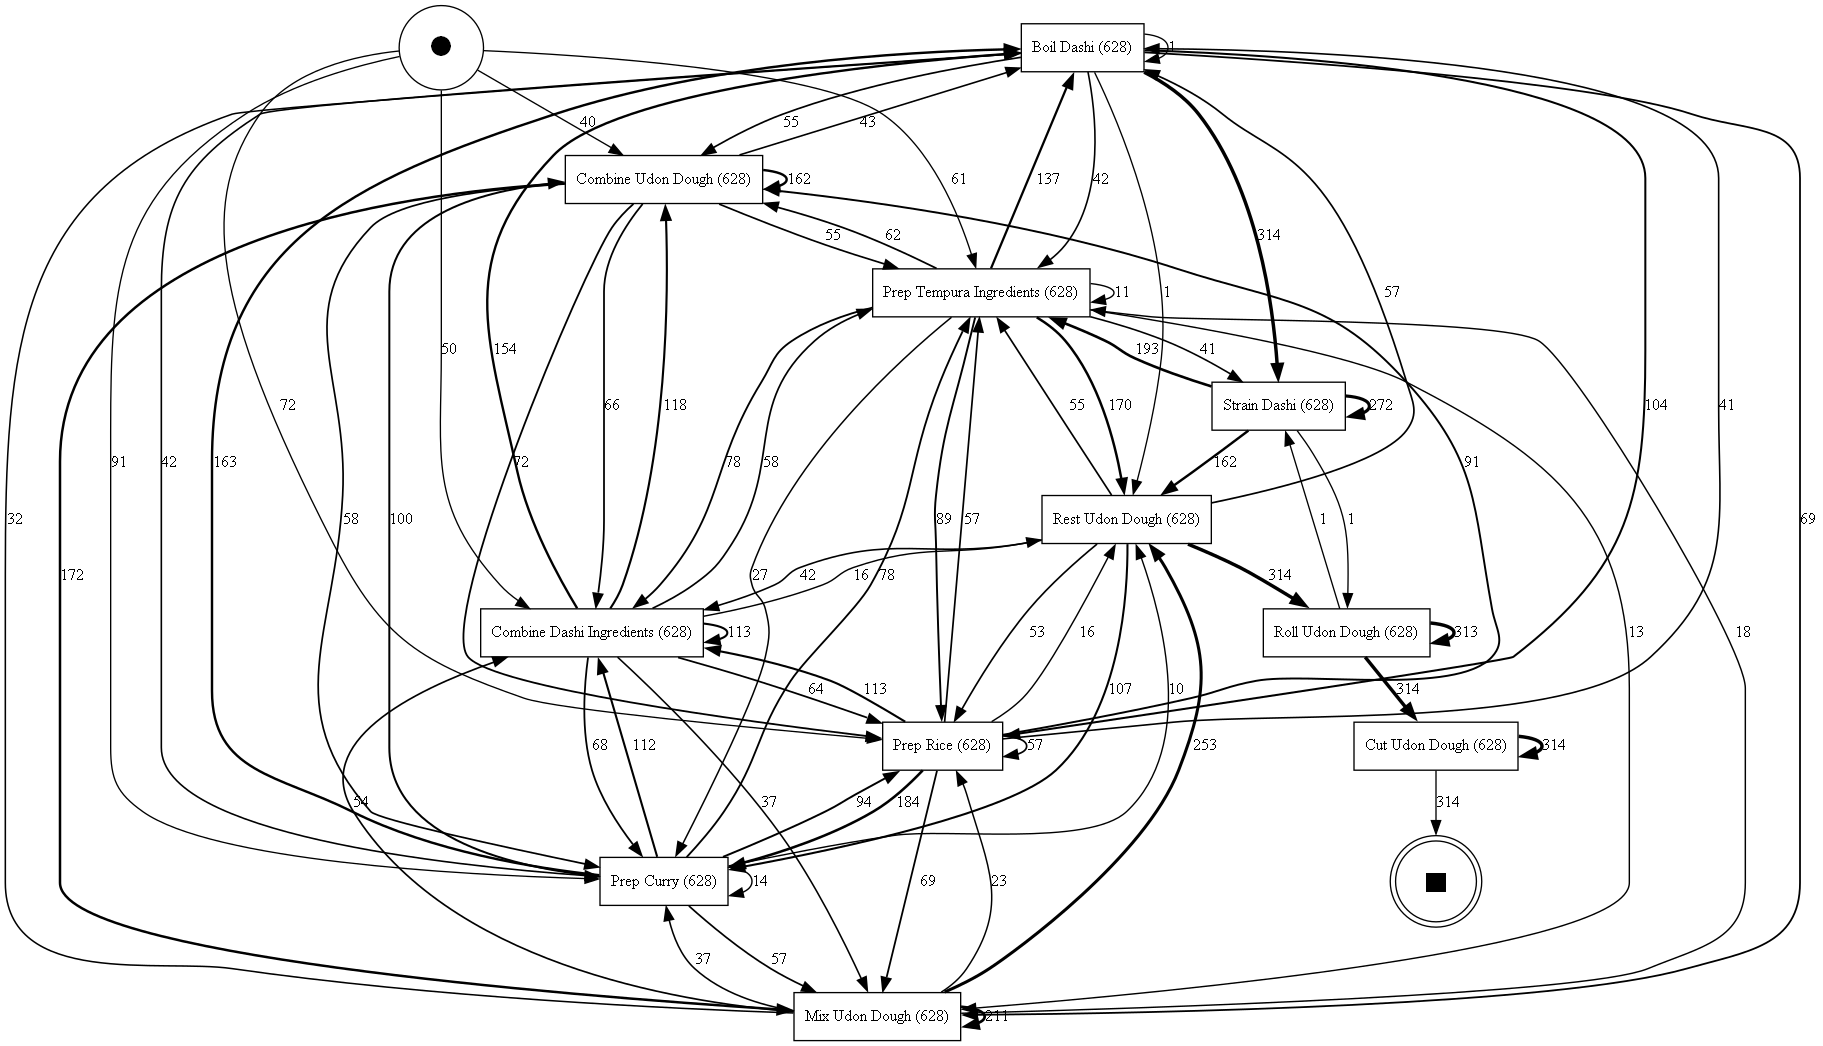

In [39]:
dfg, sa, ea = pm4py.discover_directly_follows_graph(log_ing_prep_A)
pm4py.view_dfg(dfg, sa, ea)
pm4py.save_vis_dfg(dfg, sa, ea, os.path.join("output_imgs", "ing_prep_A_dfg.png"))

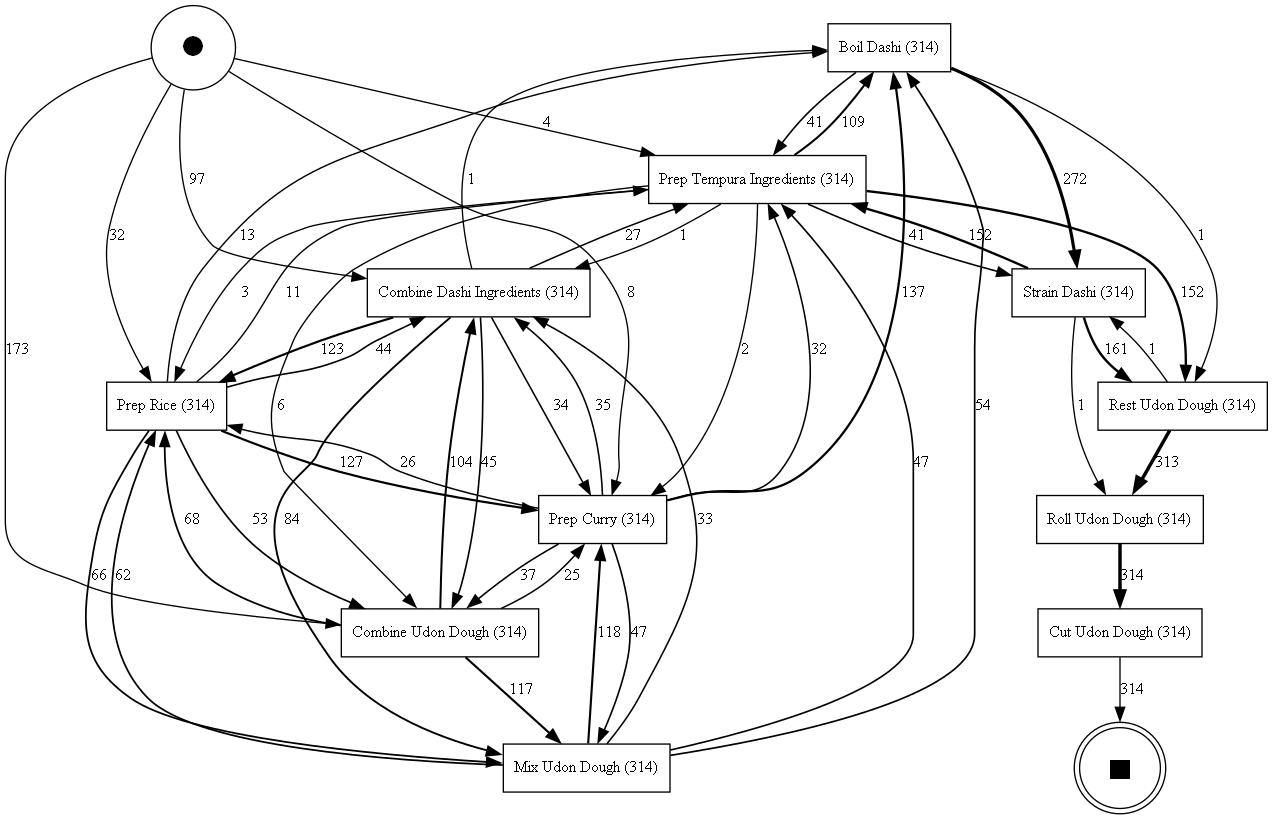

In [40]:
dfg, sa, ea = pm4py.discover_directly_follows_graph(log_ing_prep_B)
pm4py.view_dfg(dfg, sa, ea)
pm4py.save_vis_dfg(dfg, sa, ea, os.path.join("output_imgs", "ing_prep_B_dfg.png"))

In [2]:
## BPI TEST

log = pm4py.read_xes('data/event_log_q6.xes')

D:\Projects\apm-assignment-1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|█████████████████████████████████████████████████| 3/3 [00:00<00:00, 1504.41it/s]
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] =

In [3]:
net, im, fm = pm4py.discover_petri_net_alpha(log)

In [4]:
soundness_result = pm4py.check_soundness(net, im, fm)

Input is ok.
Petri Net is a workflow net.
The following places are not covered by an s-component: [({'Assess Product Quality'}, {'Document'}), ({'Detect Required Improvement'}, {'Refurbish (Complex)'})].


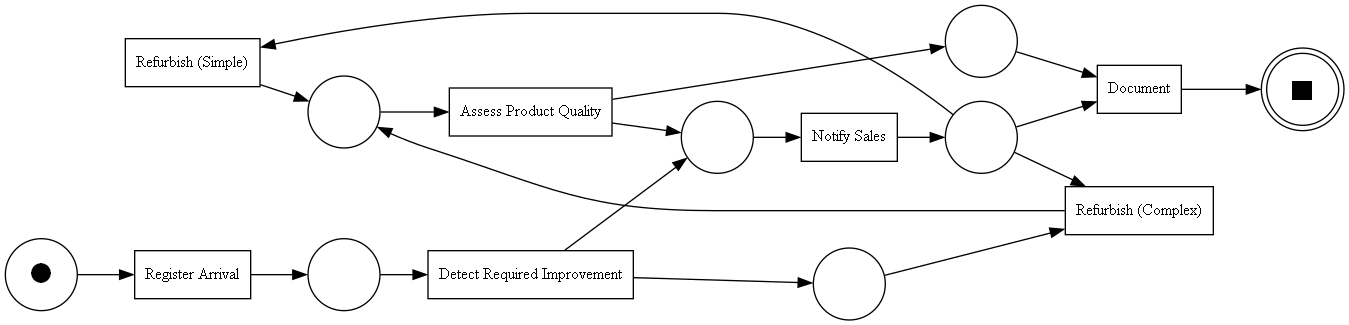

In [13]:
pm4py.view_petri_net(net, im, fm, format='png')
pm4py.save_vis_petri_net(net, im, fm, './Q6_AlphaMiner_PM4PY_Event_Log_L3.png')